# CS802 ASSIGNMENT 1 - PART 2

In [1]:
import sys
from graphviz import Digraph
import copy

class STN:
    nodes = []
    edges = []
    adj_matrix = dict()
    inf = sys.float_info.max
    
       
    def print_stn(adj_matrix):
        dot = Digraph()
        ## add nodes
        for n in stn.nodes: 
            dot.node(n)
        ## add edges
        for e in stn.edges:
            dot.edge(e[0],e[1],label = e[2])
        return dot 
    
    def print_apsp(adj_matrix):
        dot = Digraph()
        ## add nodes
        for n in apsp.nodes:
            dot.node(n)
        ## add edges
        for e in apsp.edges:
            dot.edge(e[0],e[1],label=e[2])    
        return dot
    
    def print_minimal(adj_matrix):
        dot=Digraph()
        ## add nodes
        for n in minimal.nodes:
            dot.node(n)
        ## add edges
        for e in minimal.edges:
            dot.edge(e[0],e[1], label=e[2])
        return dot
     
    def check_consistency():
        for i in (list(adj_matrix)):
            for j in (list(adj_matrix)):
                if (adj_matrix[i][j] + adj_matrix[j][i]) < 0:
                    return False
        return True

# Create an STN file 

### Get nodes and adjacencies

In [2]:
distances = []
nothing = []
filename = "match_plan_2.dot"

with open(filename, "r") as dotfile:
    stn=STN()
    apsp=STN()
    minimal = STN()
    
    for line in dotfile:
                if "->" in line:
                    parent, child = line.strip().split(" -> ")
                    child, nothing = child.strip().split(" [ label=")
                    distance = str(line.split('"')[1::2]) # the [1::2] is a slicing which extracts odd values
                    distance= (distance.replace("[",''))
                    distance= (distance.replace("]",''))
                    distance= (distance.replace("'",''))
                    distances.append(distance)

                    #Update node list
                    if parent not in stn.nodes:
                        stn.nodes.append(parent)
                    if child not in stn.nodes:
                        stn.nodes.append(child)

                    # Update edge list
                    label=distance
                    edge = [parent, child, label]
                    stn.edges.append(edge)

                    #Update Adjacency List
                    keys = list(stn.adj_matrix) #Get the keys

                        ##IF NEW ENTRY e.g. origin node is not yet included in ADJ LIST
                    if parent not in keys: #If this Origin node has no entries in Dictionary
                        stn.adj_matrix[parent]={}
                        stn.adj_matrix[parent][child] = int(float(distance))
                        #stn.adj_list.update(new_entry) #Add new entry to Adjacency list

                        ##IF ORIGIN NODE IS INSIDE ADJ LIST
                    elif parent in keys: #If this Origin node has already got adjacencies in the dictionary
                        stn.adj_matrix[parent][child] = int(float(distance))  


# All pairs shortest - Floyd Warshall

In [4]:
if stn.check_consistency:
    apsp.adj_matrix = stn.adj_matrix.copy()
       
    for n in stn.nodes:
        if n not in (list(apsp.adj_matrix)):
            apsp.adj_matrix[n] = {}      ## Add nodes that are not parents as indexes for the matrix  

    ## Set all self distances to 0 and missing instances to infinity
    for i in (list(apsp.adj_matrix)):
        for x in (list(apsp.adj_matrix)):
            if i==x:
                apsp.adj_matrix[i][x] = 0
                ## If it is a missing instance, set to infinity
            elif i!=x:
                if x not in apsp.adj_matrix[i]:
                    apsp.adj_matrix[i][x] = float('inf')
                continue 
                
    ## Make sure the distances are as short as can be!
    for k in (list(apsp.adj_matrix)):
        for i in (list(apsp.adj_matrix)):
            for j in (list(apsp.adj_matrix)):
                if i!= j and j!=k and j!=i: #Make sure we aren't comparing the same nodes
                    if apsp.adj_matrix[i][j] > (apsp.adj_matrix[i][k] + apsp.adj_matrix[k][j]):
                        apsp.adj_matrix[i][j] = (apsp.adj_matrix[i][k] + apsp.adj_matrix[k][j])
    for n in stn.nodes:
        if apsp.adj_matrix[n][n]<0: #If self distance is 0, not consistent
            print ("NOT CONSISTENT")      
else:
    print ("NOT CONSISTENT")

### Prepare .nodes and .edges for Digraph

In [5]:
apsp.nodes = stn.nodes.copy()
apsp.edges = []

for parent in (list(apsp.adj_matrix)):
    for child in ((apsp.adj_matrix)[parent]):
        distance = apsp.adj_matrix[parent][child]
        edge = [parent, child, str(distance)]
        apsp.edges.append(edge)

# Make minimal

In [7]:
minimal.adj_matrix = apsp.adj_matrix.copy()
minimal.nodes = apsp.nodes.copy()
minimal.edges = []

## Remove dominated edges!
for k in minimal.nodes:
    for i in minimal.nodes:
        for j in minimal.nodes:
            if i != j and j != k and k != i: #make sure we aren't comparing the same node
                if (k in minimal.adj_matrix[i]) and (j in minimal.adj_matrix[i]) and (j in minimal.adj_matrix[k]): 
                    #the distance being compared hasn't been removed yet
                    if apsp.adj_matrix[i][j] >= (apsp.adj_matrix[i][k] + apsp.adj_matrix[k][j]):
                        if ((apsp.adj_matrix[i][k]<0 and apsp.adj_matrix[i][j]<0) #make sure these are - vectors
                        or (apsp.adj_matrix[i][j]>=0 and apsp.adj_matrix[k][j]>= 0)): #or these are + vectors
                            del (minimal.adj_matrix[i][j]) # delete

### Prepare .nodes and .edges for Digraph

In [8]:
for parent in minimal.nodes:
    for child in ((minimal.adj_matrix)[parent]):
        distance = minimal.adj_matrix[parent][child]
        edge = [parent, child, str(distance)]
        if parent != child: ##delete self distances
            if distance != float('inf'): ##delete inifity distances
                minimal.edges.append(edge)

# Solution

Original STN


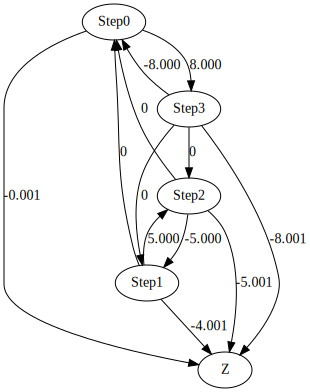

In [10]:
print ("Original STN")
stn.print_stn()

All Pairs Shortest Path


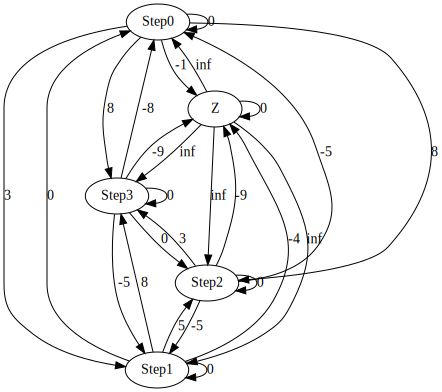

In [11]:
print ("All Pairs Shortest Path")
apsp.print_apsp()

Minimal - Dominated Edges Removed


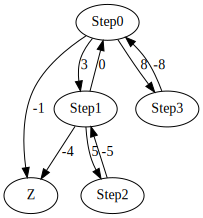

In [12]:
print ("Minimal - Dominated Edges Removed")
minimal.print_minimal()